# Results Analysis

In [146]:
import sqlite3
from itertools import product

import os
from copy import deepcopy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from config import *
from utils import *

In [110]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [225]:
sns.set_theme(style="ticks")

conn = sqlite3.connect(DB_PATH)

df = pd.read_sql("SELECT * FROM cvrp_best_results", conn)

In [226]:
# ==== Methods to analyse ====
method_mapping = {
    'random(5)': 'Random(k=5)',
    'model(5):v58': 'GAT-RL(k=5)'
}
methods = method_mapping.values()

df['method'] = df['method'].replace(method_mapping)

# ==== Instances to analyse ====
instance_parameters = "1123"
train_20_instances = [f"XML{size}_{instance_parameters}_{idx:02d}" for size, idx in product([20], range(0, 10))]
train_50_instances = [f"XML{size}_{instance_parameters}_{idx:02d}" for size, idx in product([50], range(0, 10))]
train_100_instances = [f"XML{size}_{instance_parameters}_{idx:02d}" for size, idx in product([100], range(0, 10))]
all_train_instances = train_20_instances + train_50_instances + train_100_instances

test_20_instances = [f"XML{size}_{instance_parameters}_{idx:02d}" for size, idx in product([20], range(100, 110))]
test_50_instances = [f"XML{size}_{instance_parameters}_{idx:02d}" for size, idx in product([50], range(100, 110))]
test_100_instances = [f"XML{size}_{instance_parameters}_{idx:02d}" for size, idx in product([100], range(100, 110))]
all_test_instances = test_20_instances + test_50_instances + test_100_instances

check(df, instances=test_20_instances, methods=methods)
check(df, instances=test_50_instances, methods=methods)
check(df, instances=test_100_instances, methods=methods)

check(df, instances=train_20_instances, methods=methods)
# check(df, instances=train_50_instances, methods=methods)
# check(df, instances=train_100_instances, methods=methods)

Missing results for instance 'XML100_1123_100', method 'GAT-RL(k=5)', seed '2'
Missing results for instance 'XML100_1123_100', method 'GAT-RL(k=5)', seed '3'
Missing results for instance 'XML100_1123_100', method 'GAT-RL(k=5)', seed '4'
Missing results for instance 'XML100_1123_100', method 'GAT-RL(k=5)', seed '5'
Missing results for instance 'XML100_1123_100', method 'GAT-RL(k=5)', seed '6'
Missing results for instance 'XML100_1123_100', method 'GAT-RL(k=5)', seed '7'
Missing results for instance 'XML100_1123_100', method 'GAT-RL(k=5)', seed '8'
Missing results for instance 'XML100_1123_100', method 'GAT-RL(k=5)', seed '9'
Missing results for instance 'XML100_1123_101', method 'GAT-RL(k=5)', seed '1'
Missing results for instance 'XML100_1123_101', method 'GAT-RL(k=5)', seed '2'
Missing results for instance 'XML100_1123_101', method 'GAT-RL(k=5)', seed '3'
Missing results for instance 'XML100_1123_101', method 'GAT-RL(k=5)', seed '4'
Missing results for instance 'XML100_1123_101', meth

True

In [227]:
steps = list(range(1, 11)) + list(range(20, 51, 10))

df_train_20 = filter_records(df, train_20_instances, methods, steps)
df_train_50 = filter_records(df, train_50_instances, methods, steps)
df_train_100 = filter_records(df, train_100_instances, methods, steps)

df_test_20 = filter_records(df, test_20_instances, methods, steps)
df_test_50 = filter_records(df, test_50_instances, methods, steps)
df_test_100 = filter_records(df, test_100_instances, methods, steps)

avg_df_train_20 = avg_over_seeds(df_train_20)
avg_df_train_50 = avg_over_seeds(df_train_50)
avg_df_train_100 = avg_over_seeds(df_train_100)

avg_df_test_20 = avg_over_seeds(df_test_20)
avg_df_test_50 = avg_over_seeds(df_test_50)
avg_df_test_100 = avg_over_seeds(df_test_100)

## Objective value over steps

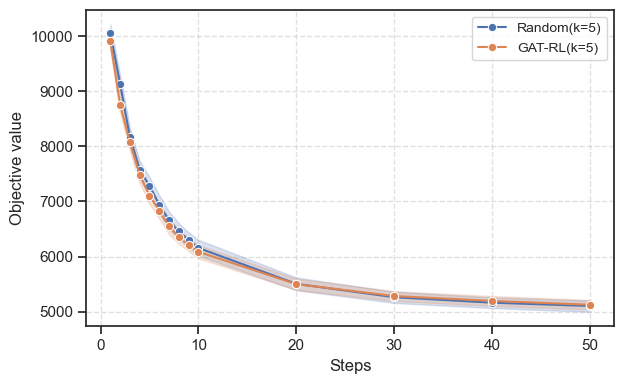

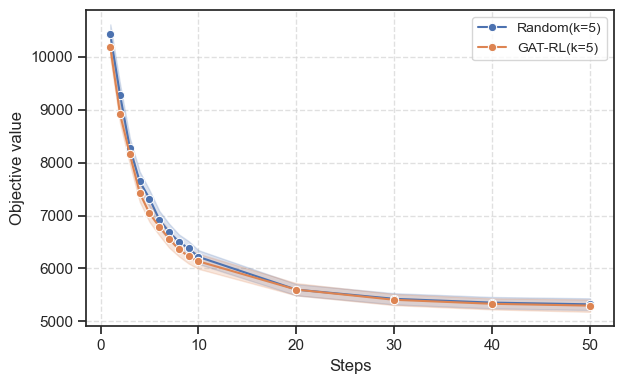

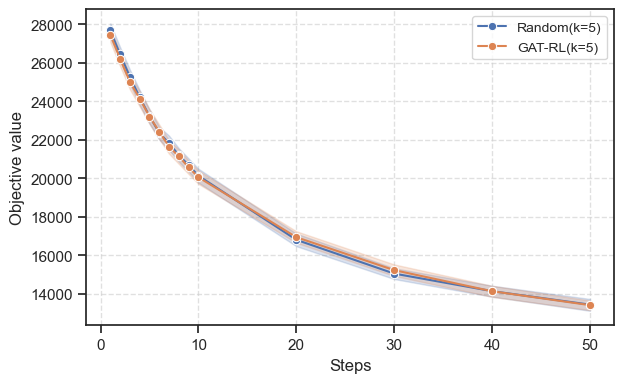

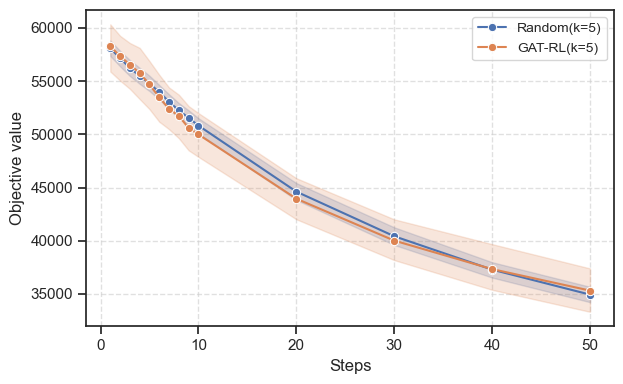

In [228]:
plot_value_over_steps(df_train_20)
# plot_value_over_steps(df_train_50)
# plot_value_over_steps(df_train_100)

plot_value_over_steps(df_test_20)
plot_value_over_steps(df_test_50)
plot_value_over_steps(df_test_100)

## Best Objective Values

In [229]:
best = df.loc[df.groupby('instance')['objective_value'].idxmin()]
best

,instance,subset,method,seed,steps,initial_objective_value,objective_value,time,avg_time_per_step
42649,XML100_1123_00,train,random(6),0,48,58042.0,35958.0,112.846,2.351
6783,XML100_1123_01,train,Random(k=5),5,50,53870.0,32755.0,40.652,0.813
7938,XML100_1123_02,train,Random(k=5),7,50,61103.0,36810.0,35.562,0.711
8525,XML100_1123_03,train,Random(k=5),3,50,58334.0,33226.0,38.905,0.778
9833,XML100_1123_04,train,Random(k=5),7,48,56420.0,34909.0,35.523,0.740
...,...,...,...,...,...,...,...,...,...
4638,XML50_1123_105,test,Random(k=5),8,50,29447.0,13125.0,30.979,0.620
4847,XML50_1123_106,test,Random(k=5),6,50,25830.0,13630.0,28.183,0.564
5029,XML50_1123_107,test,Random(k=5),3,50,30469.0,12992.0,30.640,0.613
40031,XML50_1123_108,test,GAT-RL(k=5),8,48,31318.0,13091.0,28.537,0.595


## Winning Rate
The proportion of instances (the winning rate) for which the methods in the rows outperform these in the columns.

In [215]:
def calculate_winning_rate(df, steps, methods=None):
    df = deepcopy(df)
    df = df[df['steps'] == steps]
    
    if not methods:
        methods = df['method'].unique()
    common_instances = (
        df.groupby('instance')['method']
        .apply(set)
        .loc[lambda x: x >= set(methods)].index
    )
    print(common_instances)
    
    # Filter data to include only common instances
    df = df[df['instance'].isin(common_instances)]
    
    results = pd.DataFrame(index=methods, columns=methods, dtype=float)

    for method1 in methods:
        for method2 in methods:
            if method1 == method2:
                results.loc[method1, method2] = None
            else:
                method1_values = df[df['method'] == method1].set_index('instance')['objective_value']
                method2_values = df[df['method'] == method2].set_index('instance')['objective_value']
                
                print(f"{method1} vs {method2}")
                print(method1_values.to_numpy())
                print(method2_values.to_numpy())
                
                wins = (method1_values < method2_values).sum()
                total_comparisons = len(method1_values)
                
                win_ratio = wins / total_comparisons * 100 if total_comparisons > 0 else 0
                results.loc[method1, method2] = win_ratio
    
    return results

In [217]:
winning_rates = calculate_winning_rate(avg_df_test_20, steps=50, methods=methods)
winning_rates

Index(['XML20_1123_100', 'XML20_1123_101', 'XML20_1123_102', 'XML20_1123_103',
       'XML20_1123_104', 'XML20_1123_105', 'XML20_1123_106', 'XML20_1123_107',
       'XML20_1123_108', 'XML20_1123_109'],
      dtype='object', name='instance')
Random(k=5) vs GAT-RL(k=5)
[5078.5 5732.1 4563.8 4510.5 5198.6 6316.4 5678.4 5792.  5204.5 5150.7]
[5086.5 5712.7 4522.9 4528.6 5198.9 6293.1 5699.8 5712.4 5105.3 5121.8]
GAT-RL(k=5) vs Random(k=5)
[5086.5 5712.7 4522.9 4528.6 5198.9 6293.1 5699.8 5712.4 5105.3 5121.8]
[5078.5 5732.1 4563.8 4510.5 5198.6 6316.4 5678.4 5792.  5204.5 5150.7]


,Random(k=5),GAT-RL(k=5)
Random(k=5),NaN,40.0
GAT-RL(k=5),60.0,NaN


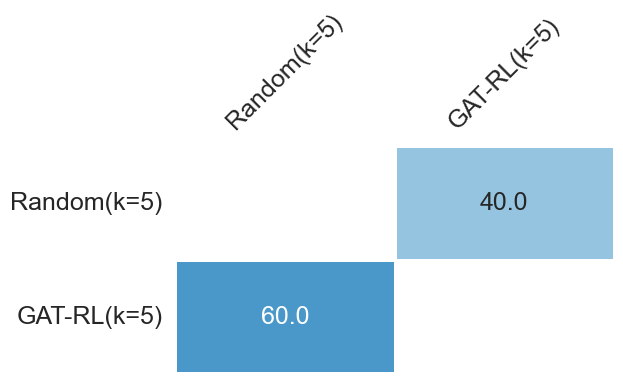

In [218]:
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import matplotlib.pyplot as plt

with sns.axes_style("white"):
    plt.figure(figsize=(6.4, 4))
    
    cmap = LinearSegmentedColormap.from_list("", ["orange", "yellowgreen"])
    cmap = sns.color_palette("Blues", as_cmap=True)
    # cmap = sns.diverging_palette(20, 230, as_cmap=True)
    cmap.set_bad(color="white")
    
    # Plot heatmap
    sns.heatmap(
        winning_rates,  # DataFrame with win ratios
        annot=True,           # Annotate cells with values
        fmt=".1f",            # Format values to 2 decimal places
        cmap=cmap,            # Custom colormap
        cbar=False,            # Add color bar
        linewidths=2,
        # linecolor="black",    # Color of the gridlines
        # mask=winning_rates.isnull()  # Explicitly mask NaN values
        annot_kws={"size": 18},
        vmin=0.0,
        vmax=100.0
    )
    
    plt.tick_params(axis='both', which='major', labelsize=18, labelbottom=False, bottom=False, top=False, labeltop=True)
    plt.xticks(rotation=45) # Rotate x-axis labels
    plt.yticks(rotation=0)             # Keep y-axis labels horizontal
    
    plt.tight_layout()
    plt.show()

## Improvement over steps
The improvement over the initial solution through steps of the LNS (or time).

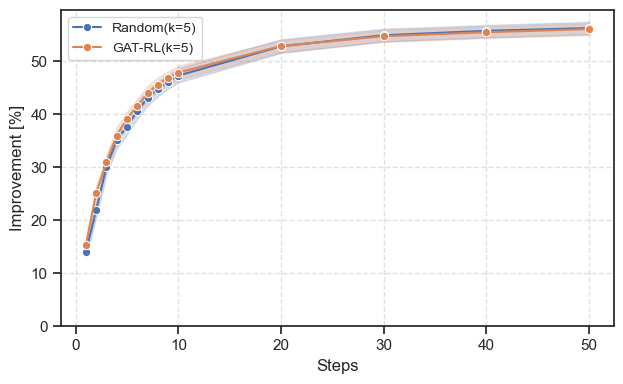

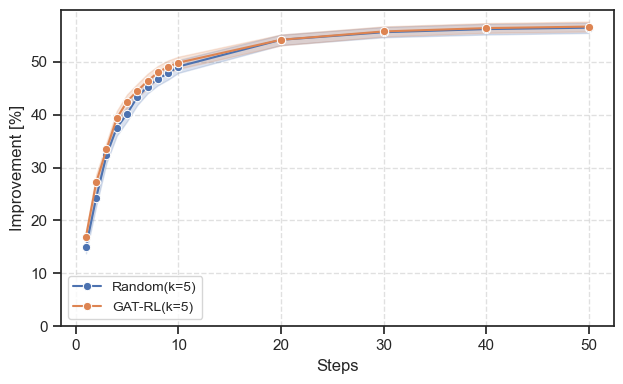

In [230]:
plot_value_over_steps(improvement(df_train_20), y="improvement", ylabel="Improvement [%]", ylim=[0], methods=methods)

plot_value_over_steps(improvement(df_test_20), y="improvement", ylabel="Improvement [%]", ylim=[0], methods=methods)

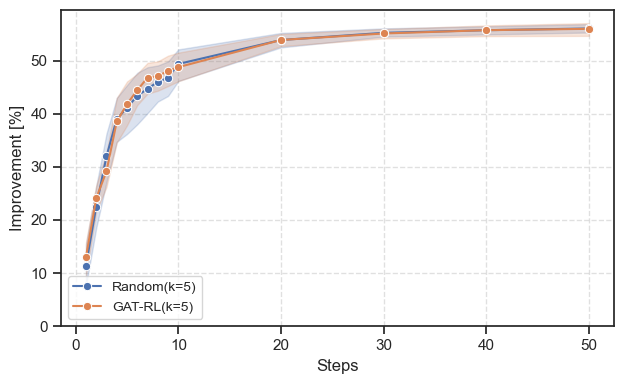

In [221]:
plot_value_over_steps(improvement(filter_records(df_test_20, ["XML20_1123_100"])), y="improvement", ylabel="Improvement [%]", ylim=[0])

## Gap

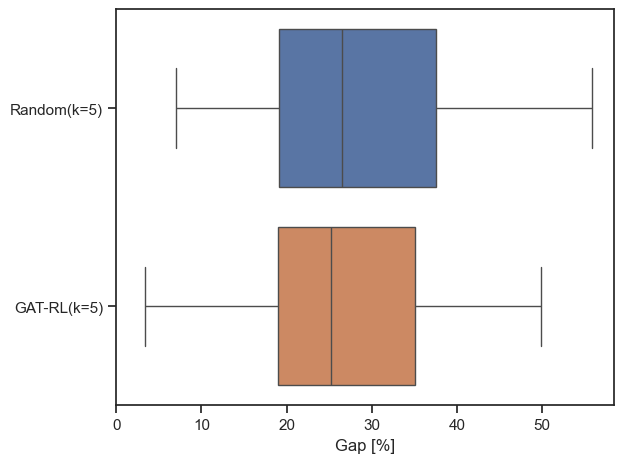

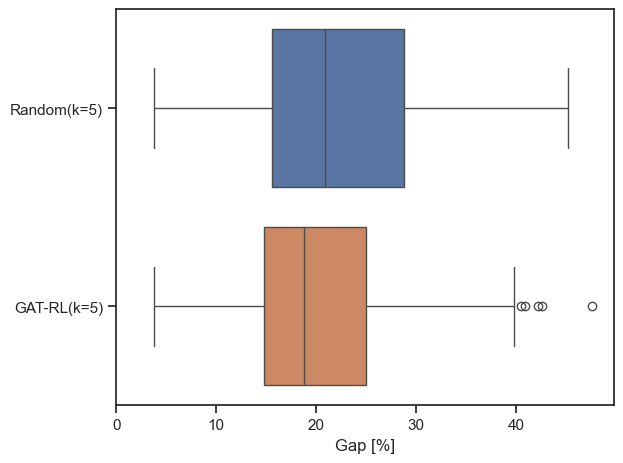

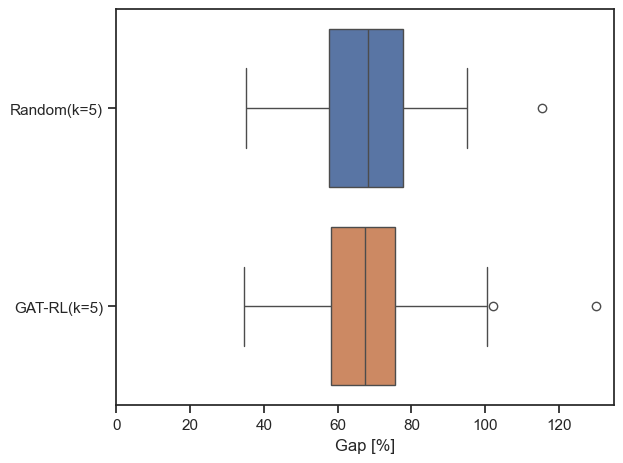

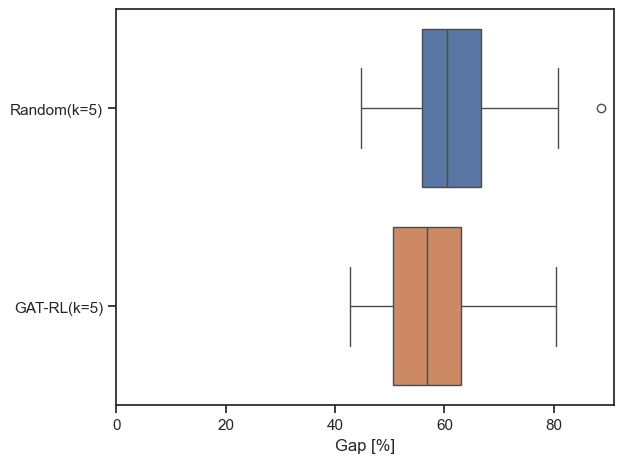

In [232]:
STEPS = 10

plot_gap(df_train_20, best, steps=STEPS, methods=methods)
# plot_gap(avg_df_train_20, best, steps=STEPS, methods=methods)

plot_gap(df_test_20, best, steps=STEPS, methods=methods)
plot_gap(df_test_50, best, steps=STEPS, methods=methods)
plot_gap(df_test_100, best, steps=STEPS, methods=methods)

## Time

In [160]:
print(filter_records(df, instances=test_20_instances, methods=['random(5)'], steps=50)['avg_time_per_step'].mean())
print(filter_records(df, instances=test_20_instances, methods=['model(5):v58'], steps=50)['avg_time_per_step'].mean())

print(filter_records(df, instances=test_50_instances, methods=['random(5)'], steps=50)['avg_time_per_step'].mean())
print(filter_records(df, instances=test_50_instances, methods=['model(5):v58'], steps=50)['avg_time_per_step'].mean())

print(filter_records(df, instances=test_100_instances, methods=['random(5)'], steps=50)['avg_time_per_step'].mean())
print(filter_records(df, instances=test_100_instances, methods=['model(5):v58'], steps=50)['avg_time_per_step'].mean())

0.52961
0.5970666666666665
0.62898
0.7193229166666666
0.8529000000000001
nan
